# Survey Visualization

In [2]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm_notebook as tqdm
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
import plotly.offline as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots
%matplotlib inline
init_notebook_mode(connected=True)   

### loading pre-configure dataset

In [3]:
df = pd.read_csv("kaushal.csv")

In [4]:
list(df.columns.values)

['id',
 'Name of Municipalities?',
 'Ward No',
 'Address',
 'Type of Health facility',
 'Name of Health Facility',
 'Under which health facility does this PHC/ORC/EPI clinic operate?',
 'He/she is health facility in-charge or not?',
 'Designation of respondent',
 'Does this health facility have its own building?',
 'If not, where does the health facility currently operating?',
 'Main way to enter building through compound',
 'Ceiling needs repair?',
 'Walls need repair?',
 'Window needs repair?',
 'Doors need repair?',
 'Roof need repair?',
 'Number of rooms available in the health facilities? Number',
 'Do the health facility manage the accommodation facility for staff when needed?',
 'Do the health facility have waiting space for the in-patience, who have visited for (OPD) service?',
 'Is separate/ private space for ANC/PNC checkup available? अलग ANC र PNC जाँचको लागि र निजी स्थान उपलब्ध छरु',
 'How many bed are available in this hospital?',
 'Is this health facility CEONC, BEONC or 

In [5]:
municipalities = df["Name of Municipalities?"].value_counts()
municipalities

Nepalgunj (Banke)              227
Madhyapur thimi (Bhaktapur)    108
Attriya (Kailali)               73
Name: Name of Municipalities?, dtype: int64

# Ward wise different types of health service in 3 municipalities

## In Thimi (Bhaktapur)

In [6]:
df = pd.read_csv("kaushal.csv")

In [7]:
df = df[df["Name of Municipalities?"]=="Madhyapur thimi (Bhaktapur)"]

In [8]:
df = df[["Ward No","Type of Health facility"]]
df["Ward No"] = df["Ward No"].astype(int)

In [9]:
dff = df.groupby(["Ward No"])["Type of Health facility"]
labels = []
parents = []
values = []
for i, d in dff:
    labels.append(f"ward {i}")
    values.append(int(len(d)))
    parents.append("Bhaktapur")

for i, d in dff:
    a = d.value_counts().astype(int)
    for t in a.index:
        labels.append(f"ward {i} - {t}")
        parents.append(f"ward {i}")
    for t in a.values:
        values.append(int(t))

parents.insert(0, "")
labels.insert(0, "Bhaktapur")
values.insert(0, len(df))

In [10]:
trace = go.Sunburst(
    labels=labels,
    parents=parents,
    values=values,
    outsidetextfont = {"size": 20, "color": "#377eb8"},
    marker = {"line": {"width": 2}},
)

layout = go.Layout(
    title = "Types of health service in different Wards of Bhaktapur",
    margin = go.layout.Margin(t=30, l=0, r=0, b=0)
)

py.iplot(go.Figure([trace], layout), filename='nepalgunj_sunburst_chart')

## In Nepalgunj (Banke)

In [11]:
df = pd.read_csv("kaushal.csv")

In [12]:
df = df[df["Name of Municipalities?"]=="Nepalgunj (Banke)"]

In [13]:
df = df[["Ward No","Type of Health facility"]]
df["Ward No"] = df["Ward No"].astype(int)

In [14]:
dff = df.groupby(["Ward No"])["Type of Health facility"]
labels = []
parents = []
values = []
for i, d in dff:
    labels.append(f"ward {i}")
    values.append(int(len(d)))
    parents.append("Nepalgunj")

for i, d in dff:
    a = d.value_counts().astype(int)
    for t in a.index:
        labels.append(f"ward {i} - {t}")
        parents.append(f"ward {i}")
    for t in a.values:
        values.append(int(t))

parents.insert(0, "")
labels.insert(0, "Nepalgunj")
values.insert(0, len(df))

In [15]:
trace = go.Sunburst(
    labels=labels,
    parents=parents,
    values=values,
    outsidetextfont = {"size": 20, "color": "#377eb8"},
    marker = {"line": {"width": 2}},
)

layout = go.Layout(
    title = "Types of health service in different Wards of Nepalgunj",
    margin = go.layout.Margin(t=30, l=0, r=0, b=0)
)

py.iplot(go.Figure([trace], layout), filename='nepalgunj_sunburst_chart')

## In Attriya (Kailali) Godawari

In [16]:
df = pd.read_csv("kaushal.csv")

In [17]:
df = df[df["Name of Municipalities?"]=="Attriya (Kailali)"]

In [18]:
df = df[["Ward No","Type of Health facility"]]
df["Ward No"] = df["Ward No"].astype(int)

In [19]:
dff = df.groupby(["Ward No"])["Type of Health facility"]
labels = []
parents = []
values = []
for i, d in dff:
    labels.append(f"ward {i}")
    values.append(int(len(d)))
    parents.append("Godawari")

for i, d in dff:
    a = d.value_counts().astype(int)
    for t in a.index:
        labels.append(f"ward {i} - {t}")
        parents.append(f"ward {i}")
    for t in a.values:
        values.append(int(t))

parents.insert(0, "")
labels.insert(0, "Godawari")
values.insert(0, len(df))

In [20]:
trace = go.Sunburst(
    labels=labels,
    parents=parents,
    values=values,
    outsidetextfont = {"size": 20, "color": "#377eb8"},
    marker = {"line": {"width": 2}},
)

layout = go.Layout(
    title = "Types of health service in different Wards of Godawari",
    margin = go.layout.Margin(t=30, l=0, r=0, b=0)
)

py.iplot(go.Figure([trace], layout), filename='basic_sunburst_chart')

# Repair Requirements

## In Bhaktapur

In [21]:
df = pd.read_csv("kaushal.csv")
df = df[df["Name of Municipalities?"]=="Madhyapur thimi (Bhaktapur)"]
df = df[["Ceiling needs repair?","Walls need repair?","Window needs repair?","Doors need repair?","Roof need repair?"]]
df = df.dropna(axis=0)
d = pd.DataFrame()
for col in df.columns:
    d[col] = df[col].value_counts()
d = d.fillna(0)
d = d[d.index=='Yes']
d

,Ceiling needs repair?,Walls need repair?,Window needs repair?,Doors need repair?,Roof need repair?
Yes,2,1,1,0.0,0.0


## In Nepalgunj

In [22]:
df = pd.read_csv("kaushal.csv")
df = df[df["Name of Municipalities?"]=="Nepalgunj (Banke)"]
df = df[["Ceiling needs repair?","Walls need repair?","Window needs repair?","Doors need repair?","Roof need repair?"]]
df = df.dropna(axis=0)
d = pd.DataFrame()
for col in df.columns:
    d[col] = df[col].value_counts()
d = d.fillna(0)
d = d[d.index=='Yes']
d

,Ceiling needs repair?,Walls need repair?,Window needs repair?,Doors need repair?,Roof need repair?
Yes,6,7,8,8,6


## In Attriya Kailali Godawari

In [23]:
df = pd.read_csv("kaushal.csv")
df = df[df["Name of Municipalities?"]=="Attriya (Kailali)"]
df = df[["Ceiling needs repair?","Walls need repair?","Window needs repair?","Doors need repair?","Roof need repair?"]]
df = df.dropna(axis=0)
d = pd.DataFrame()
for col in df.columns:
    d[col] = df[col].value_counts()
d = d.fillna(0)
d = d[d.index=='Yes']
d

,Ceiling needs repair?,Walls need repair?,Window needs repair?,Doors need repair?,Roof need repair?


## Inference: Godawari Municipality has no health facilities to repair

# Rooms and beds in bhaktapur

In [24]:
df = pd.read_csv("kaushal.csv")
df = df[df["Name of Municipalities?"]=="Madhyapur thimi (Bhaktapur)"]
df = df[["Number of rooms available in the health facilities? Number","How many bed are available in this hospital?"]]

In [25]:
df = df.dropna(axis=0,how='all')
fig = make_subplots(rows=1, cols=3)
df

,Number of rooms available in the health facilities? Number,How many bed are available in this hospital?
0,2.0,NaN
2,3.0,NaN
3,5.0,NaN
4,5.0,NaN
6,1.0,NaN
93,8.0,NaN
95,2.0,NaN
176,30.0,100.0
245,30.0,50.0
348,24.0,100.0


In [37]:
fig = go.Figure(data=[go.Histogram(x=df["Number of rooms available in the health facilities? Number"])])
fig.update_layout(
    height=500,
    width=500,
    title="Number of rooms available in the health facilities? Bhaktapur",
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="room capacities in health facilities",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="number of rooms in a health facilities",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    )) 
fig.show()

In [38]:
fig = go.Figure(data=[go.Histogram(x=df["How many bed are available in this hospital?"])])
fig.update_layout(
    height=500,
    width=500,
    title="How many bed are available in this hospital?",
    xaxis=go.layout.XAxis(
            title=go.layout.xaxis.Title(
                text="bed capacities in health facilities",
                font=dict(
                    family="Courier New, monospace",
                    size=18,
                    color="#7f7f7f"
                )
            )
        ),
        yaxis=go.layout.YAxis(
            title=go.layout.yaxis.Title(
                text="number of rooms in a health facilities",
                font=dict(
                    family="Courier New, monospace",
                    size=18,
                    color="#7f7f7f"
                )
            )
        )) 
fig.show()


## Bed and Room in Nepalgunj

In [42]:
df = pd.read_csv("kaushal.csv")
df = df[df["Name of Municipalities?"]=="Nepalgunj (Banke)"]
df = df[["Number of rooms available in the health facilities? Number","How many bed are available in this hospital?"]]

In [43]:
df = df.dropna(axis=0,how='all')
fig = make_subplots(rows=1, cols=3)
df.head()

,Number of rooms available in the health facilities? Number,How many bed are available in this hospital?
26,2.0,NaN
64,2.0,NaN
70,3.0,NaN
119,60.0,50.0
122,3.0,NaN


In [46]:
fig = go.Figure(data=[go.Histogram(x=df["Number of rooms available in the health facilities? Number"])])
fig.update_layout(
    height=500,
    width=600,
    title="Number of rooms available in the health facilities? Nepalgunj",
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="room capacities in health facilities",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="number of rooms in a health facilities",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    )) 
fig.show()

In [47]:
fig = go.Figure(data=[go.Histogram(x=df["How many bed are available in this hospital?"])])
fig.update_layout(
    height=500,
    width=500,
    title="How many bed are available in this hospital? Nepalgunj",
    xaxis=go.layout.XAxis(
            title=go.layout.xaxis.Title(
                text="bed capacities in health facilities",
                font=dict(
                    family="Courier New, monospace",
                    size=18,
                    color="#7f7f7f"
                )
            )
        ),
        yaxis=go.layout.YAxis(
            title=go.layout.yaxis.Title(
                text="number of rooms in a health facilities",
                font=dict(
                    family="Courier New, monospace",
                    size=18,
                    color="#7f7f7f"
                )
            )
        )) 
fig.show()


## Beds and rooms in Attriya Kailali Godawari

In [93]:
df = pd.read_csv("kaushal.csv")
df = df[df["Name of Municipalities?"]=="Attriya (Kailali)"]
df = df[["Number of rooms available in the health facilities? Number","How many bed are available in this hospital?"]]

In [94]:
df = df.dropna(axis=0,how='all')
fig = make_subplots(rows=1, cols=3)
df.head()

,Number of rooms available in the health facilities? Number,How many bed are available in this hospital?
9,4.0,NaN
35,16.0,NaN
156,9.0,0.0
162,25.0,51.0
163,10.0,NaN


In [96]:
fig = go.Figure(data=[go.Histogram(x=df["Number of rooms available in the health facilities? Number"])])
fig.update_layout(
    height=500,
    width=600,
    title="Number of rooms available in the health facilities? Godawari",
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="room capacities in health facilities",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="number of rooms in a health facilities",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    )) 
fig.show()

In [98]:
fig = go.Figure(data=[go.Histogram(x=df["How many bed are available in this hospital?"])])
fig.update_layout(
    height=500,
    width=500,
    title="How many bed are available in this hospital? Godawari",
    xaxis=go.layout.XAxis(
            title=go.layout.xaxis.Title(
                text="bed capacities in health facilities",
                font=dict(
                    family="Courier New, monospace",
                    size=18,
                    color="#7f7f7f"
                )
            )
        ),
        yaxis=go.layout.YAxis(
            title=go.layout.yaxis.Title(
                text="number of rooms in a health facilities",
                font=dict(
                    family="Courier New, monospace",
                    size=18,
                    color="#7f7f7f"
                )
            )
        )) 
fig.show()


# Basic Amenities Requirements Lacking

## Inference: All health facilities has primary power supply but few of them don't have backup power supply

## Backup Power Supply lack in 3 municipalities

In [77]:
df = pd.read_csv("kaushal.csv")
df = df.groupby(['Name of Municipalities?'])["Alternate power backup system (generator/inverter)"].value_counts().unstack()
df

Alternate power backup system (generator/inverter),No,Yes Functioning
Name of Municipalities?,,
Attriya (Kailali),2,5
Madhyapur thimi (Bhaktapur),7,3
Nepalgunj (Banke),17,10


In [91]:
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]])
fig.add_trace(go.Pie(labels=df.iloc[0].index, values=df.iloc[0].values, name="Attriya (Kailali)"),1, 1)
fig.add_trace(go.Pie(labels=df.iloc[1].index, values=df.iloc[1].values, name="Madhyapur thimi (Bhaktapur)"),1, 2)
fig.add_trace(go.Pie(labels=df.iloc[2].index, values=df.iloc[2].values, name="Nepalgunj (Banke)"),1, 3)
# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Lack of alternate power supply",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Godawari', x=0.10, y=0.9, font_size=15, showarrow=False),
                 dict(text='Thimi', x=0.50, y=0.9, font_size=15, showarrow=False),
                dict(text='Nepalgunj', x=0.90, y=0.9, font_size=15, showarrow=False)])
fig.show()


## Lack of Stretchers in 3 municipalities

In [100]:
df = pd.read_csv("kaushal.csv")
df = df.groupby(['Name of Municipalities?'])["Stretcher?"].value_counts().unstack()
df

Stretcher?,No,Yes Functioning
Name of Municipalities?,,
Attriya (Kailali),2,5
Madhyapur thimi (Bhaktapur),7,3
Nepalgunj (Banke),9,18


In [101]:
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]])
fig.add_trace(go.Pie(labels=df.iloc[0].index, values=df.iloc[0].values, name="Godawari"),1, 1)
fig.add_trace(go.Pie(labels=df.iloc[1].index, values=df.iloc[1].values, name="Thimi"),1, 2)
fig.add_trace(go.Pie(labels=df.iloc[2].index, values=df.iloc[2].values, name="Nepalgunj"),1, 3)
# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Lack of Stretcher",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Godawari', x=0.10, y=0.9, font_size=15, showarrow=False),
                 dict(text='Thimi', x=0.50, y=0.9, font_size=15, showarrow=False),
                dict(text='Nepalgunj', x=0.90, y=0.9, font_size=15, showarrow=False)])
fig.show()


## Lack of Toilets for Patients in 3 municipalities

In [102]:
df = pd.read_csv("kaushal.csv")
df = df.groupby(['Name of Municipalities?'])["Does the HF have a toilet for clients?"].value_counts().unstack()
df

Does the HF have a toilet for clients?,No,Yes Functioning
Name of Municipalities?,,
Attriya (Kailali),NaN,7.0
Madhyapur thimi (Bhaktapur),NaN,10.0
Nepalgunj (Banke),5.0,22.0


In [103]:
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]])
fig.add_trace(go.Pie(labels=df.iloc[0].index, values=df.iloc[0].values, name="Godawari"),1, 1)
fig.add_trace(go.Pie(labels=df.iloc[1].index, values=df.iloc[1].values, name="Thimi"),1, 2)
fig.add_trace(go.Pie(labels=df.iloc[2].index, values=df.iloc[2].values, name="Nepalgunj"),1, 3)
# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Lack of toilets for clients",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Godawari', x=0.10, y=0.9, font_size=15, showarrow=False),
                 dict(text='Thimi', x=0.50, y=0.9, font_size=15, showarrow=False),
                dict(text='Nepalgunj', x=0.90, y=0.9, font_size=15, showarrow=False)])
fig.show()


## Inference:: since Nepalgunj has many number of health facilities, some of them don't have toilets for the patients

In [104]:
df = pd.read_csv("kaushal.csv")
df = df.groupby(['Name of Municipalities?'])["Growth monitoring Service Avaliable"].value_counts().unstack()
df

Growth monitoring Service Avaliable,No,Yes
Name of Municipalities?,,
Attriya (Kailali),NaN,7.0
Madhyapur thimi (Bhaktapur),NaN,10.0
Nepalgunj (Banke),5.0,22.0


In [105]:
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]])
fig.add_trace(go.Pie(labels=df.iloc[0].index, values=df.iloc[0].values, name="Godawari"),1, 1)
fig.add_trace(go.Pie(labels=df.iloc[1].index, values=df.iloc[1].values, name="Thimi"),1, 2)
fig.add_trace(go.Pie(labels=df.iloc[2].index, values=df.iloc[2].values, name="Nepalgunj"),1, 3)
# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Avaibility of Growth Monitoring Service",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Godawari', x=0.10, y=0.9, font_size=15, showarrow=False),
                 dict(text='Thimi', x=0.50, y=0.9, font_size=15, showarrow=False),
                dict(text='Nepalgunj', x=0.90, y=0.9, font_size=15, showarrow=False)])
fig.show()


## Inference:: few health facilities in nepalgunj have lack of  Avaibility of Growth Monitoring Service

## Health Service Scoring in 3 municipalities

In [130]:
df = pd.read_csv("kaushal.csv")
columns = ["Name of Municipalities?",
    "Do the health facility manage the accommodation facility for staff when needed?",
          "Do the health facility have waiting space for the in-patience, who have visited for (OPD) service?",
          ]
columns += ['Is separate/ private space for ANC/PNC checkup available? अलग ANC र PNC जाँचको लागि र निजी स्थान उपलब्ध छरु',
 'Does this health facility manage the accommodation facility for staff nurse/ANM?',
 'Does this health facility have availability of waiting place for the maternal health service?',
 'Does this heath facility have a separate toilet in the labour room for the delivering women?',
 'Does this HF have implemented Ama surakchya Karyakram ?',
 'OPD service avaliable?',
 'Preventive, promotive, community mobilization, health education and peer education Service Avaliable?',
 'Immunization Service Avaliable',
 'Deworming Service Avaliable ?',
 'CB-IMNCI Service Avaliable?',
 'Antenatal services Service Avaliable',
 'Delivery services (BC/BEONC) Service Avaliable',
 'Postnatal service Service Avaliable',
 'q301a11 Service Avaliable',
 'Oral pills for family planning Service Avaliable',
 'Injectable contraceptive Service Avaliable',
 'IUCD Service Avaliable',
 'Male sterilization Service Avaliable',
 'Female sterilization Service Avaliable',
 'Laboraotry Service Avaliable',
 'HIV/STI testing and treatment Service Avaliable',
 'q301b1 Service Avaliable',
 'q301b2 Service Avaliable',
 'Simple abscess drainage Service Avaliable',
 'q301b4 Service Avaliable',
 'Foreign body removal (non- complicated) Service Avaliable',
 'Acute exacerbation of COPD and asthma emergency management Service Avaliable',
 'PMTCT Service Avaliable',
 'Nutrition Service Avaliable',
 'NCD Service Avaliable',
 'ASRH (Adolescent Friendly Services) Service Avaliable',
 'Mental health Service Avaliable',
 'Substance abuse Service Avaliable',
 'Oral Health Service Avaliable',
 'Ear, Nose, Throat hygiene and sanitation Service Avaliable',
 'Legal and GBV counseling Service Avaliable']
columns += ['HIV and STI counseling and ART Service Avaliable',
 'Micro-nutrients supplementation (iron, folic acid, zinc, vitaminA, iodine) Service Avaliable',
 'Post abortion care (CAC/PAC) Service Avaliable',
 'Screening for visual and hearing impairment Service Avaliable',
 'Screening for hypertension Service Avaliable',
 'Growth monitoring Service Avaliable',
 'Screening for pelvic organ prolapses, obstetric fistula, cervical cancer Service Avaliable',
 'Diabetes Screening Service Avaliable',
 'BMI (Body Mass Index) Service Avaliable',
 'Emergency and Trauma Care Services Service Avaliable',
 'Surgery Care (Emergency and C-section) Service Avaliable',
 'Blood bank/ blood transfusion services Avaliable',
 'ICU/ NICU services Avaliable',
 'Inpatient Services Avaliable',
 'Abortion Services (CAC/PAC) Avaliable',
 'Case management of diarrhea and pneumonia (for <5 years) Service Avaliable',
 'Continuity of HIV treatment Service Avaliable',
 'Continuity of TB treatment Service Avaliable',
 'Communicable Diseases (Sexual Health, malaria, etc.) Service Avaliable',
 'Physiotherapy Service Avaliable',
 'Surveillance System Service Avaliable',
 'Response Readiness Service Avaliable',
 'Nutrition for mothers and children <5 years Service Avaliable',
 'Outpatient Services Service Avaliable',
 'Mobile Clinic Services based on IDP Service Avaliable',
 'Rehabilitation Services Service Avaliable',
 'WASH monitoring Service Avaliable',
 'Status of distribution of Reproductive Health Kit (RH Kit) & Sanitary Kit Service Avaliable',
 'Psychosocial Counseling Service Avaliable',
 'Mental health Service Avaliable',
 'One-Stop Crisis Management Center (OCMC) Service Avaliable',
 'Emergency Lab services Avaliable',
 'SBA/ASBA training center Service Avaliable',
 'Cardiology services Avaliable',
 'CT scan Service Avaliable',
 'X-ray service Service Avaliable',
 'ECG/ USG Service Avaliable']

In [131]:
df = df[columns]
len(columns)

76

In [132]:
df = df.dropna(axis=0,how="all").fillna(0)
df.replace('No', 0,inplace=True)
df.replace('Yes', 1,inplace=True)
df.replace('Yes Functioning', 1,inplace=True)

In [175]:
df.groupby(["Name of Municipalities?"]).sum().sum(axis=1)

Name of Municipalities?
Attriya (Kailali)              267
Madhyapur thimi (Bhaktapur)    402
Nepalgunj (Banke)              844
dtype: int64

<Figure size 2880x2880 with 0 Axes>

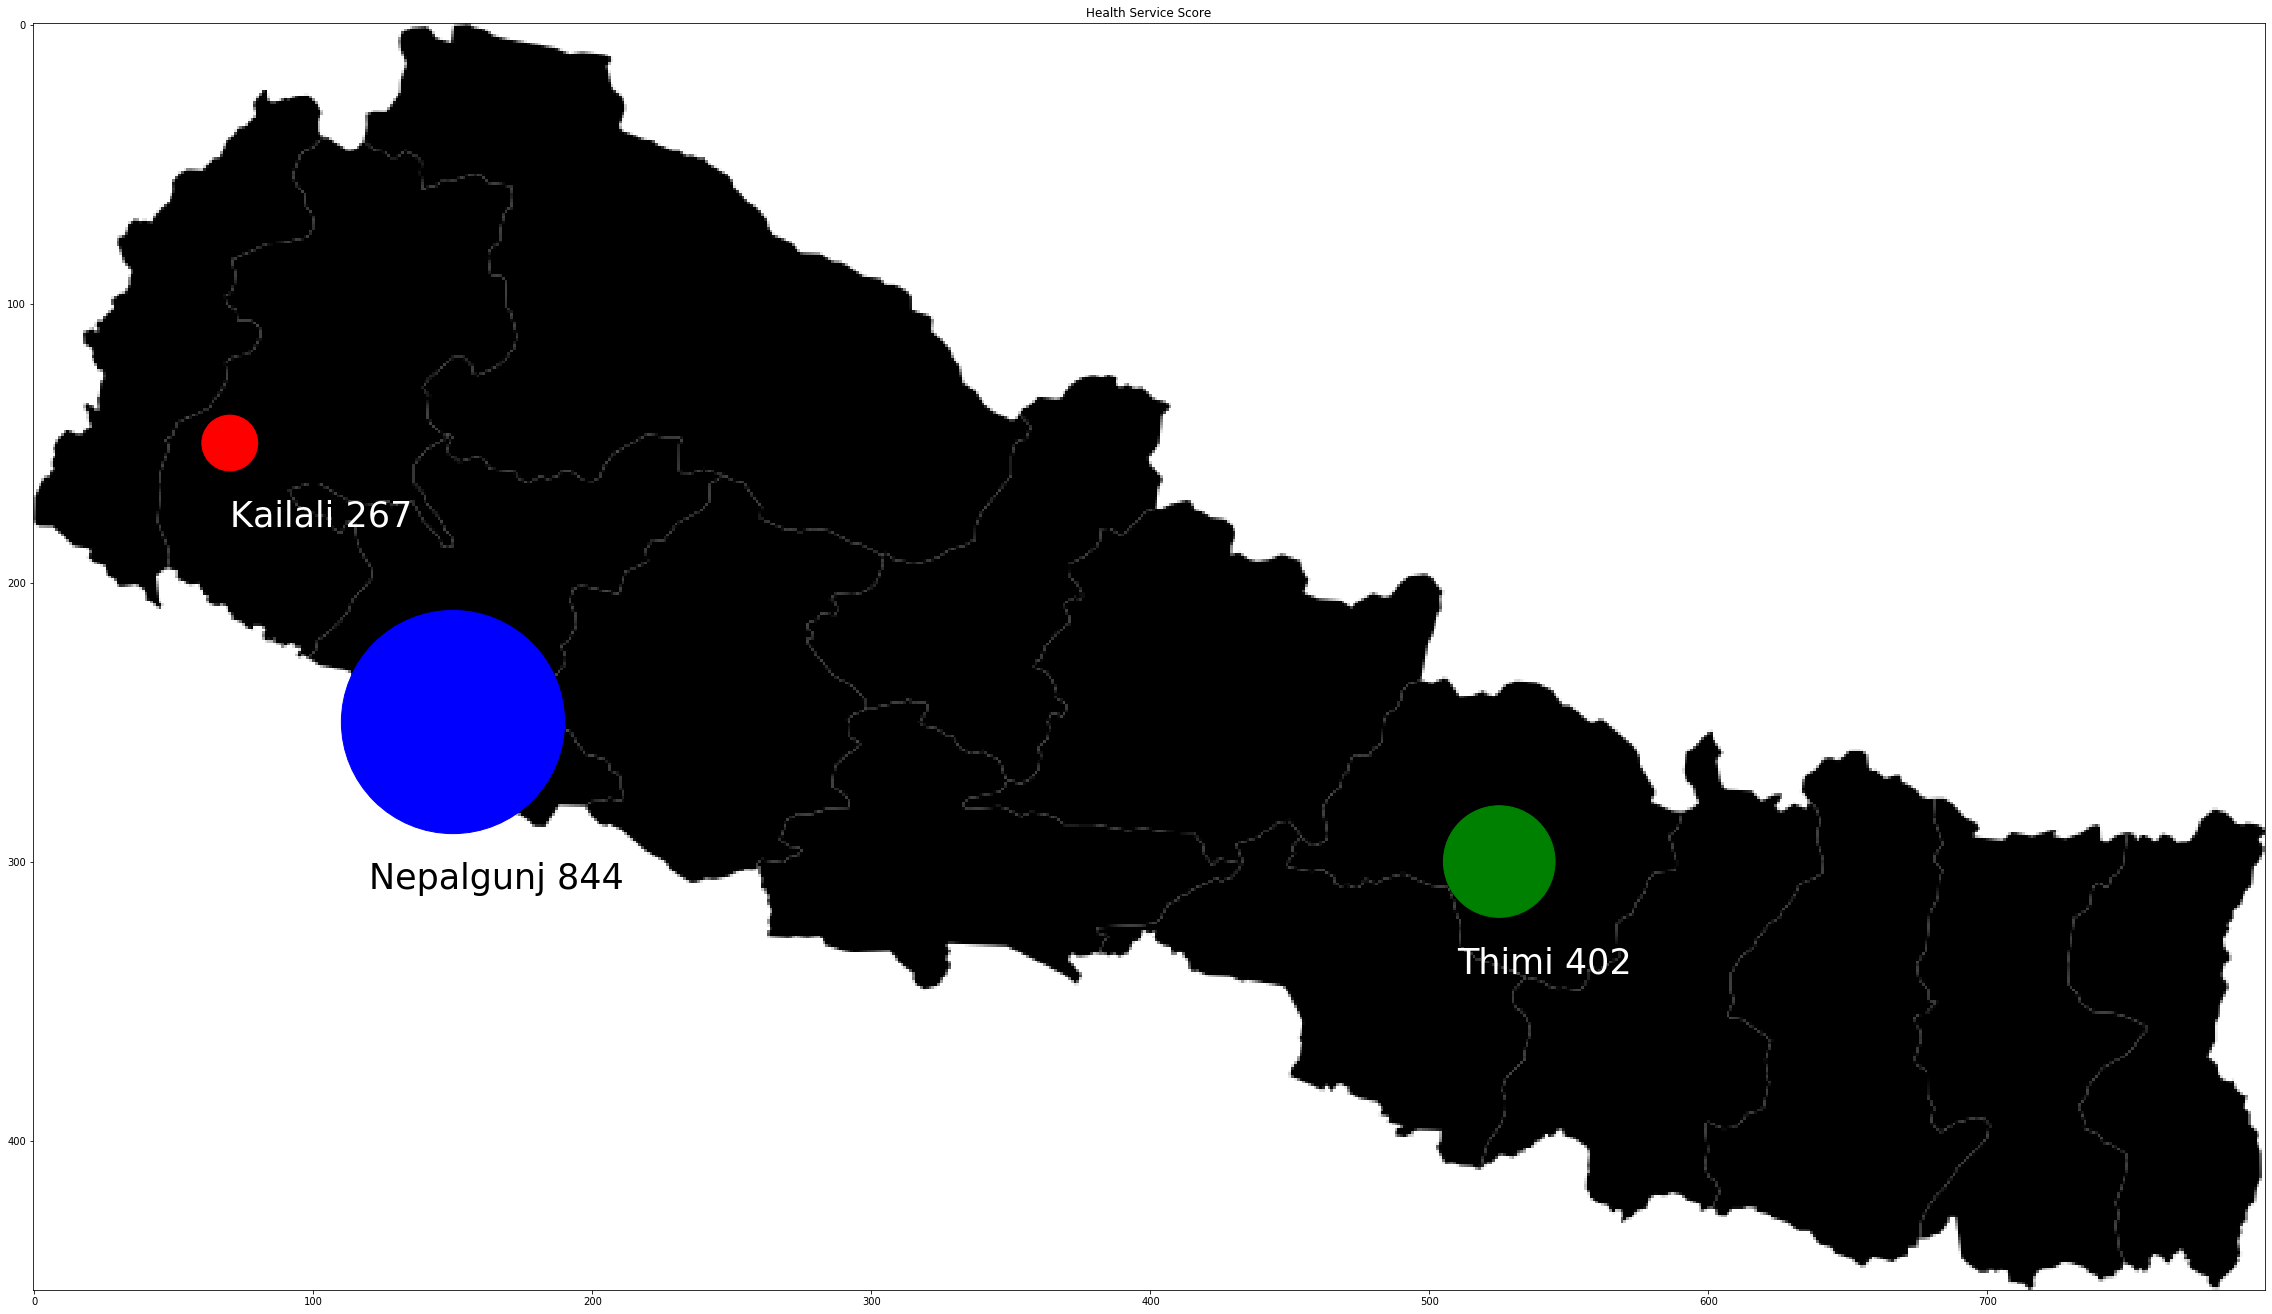

In [193]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle
%matplotlib inline
plt.figure(figsize=(40,40))

img = plt.imread('nepal.png')


# Make some example data
x = np.random.rand(5)*img.shape[1]
y = np.random.rand(5)*img.shape[0]

# Create a figure. Equal aspect so circles look circular
fig,ax = plt.subplots(1,figsize=(40,40))

# Show the image
ax.imshow(img)
circ = Circle((150,250),20*2,color='blue')
plt.text(120,310,"Nepalgunj 844",fontsize=35)
ax.add_patch(circ)


circ = Circle((70,150),5*2,color='red')
plt.text(70,180,"Kailali 267",fontsize=35,color='white')

ax.add_patch(circ)

circ = Circle((525,300),10*2,color='green')
plt.text(510,340,"Thimi 402",fontsize=35,color='white')
ax.add_patch(circ)


    
# Show the image
plt.title("Health Service Score")
plt.show()
